In [1]:
import re
import pandas as pd
import sqlite3
import numpy as np

In [65]:
connection = sqlite3.connect("VoteStatistic.db")
df = pd.read_sql("SELECT * from tableStatistic", connection)
df

,ТИК,Статистика по,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Амосов Михаил Иванович (%),Беглов Александр Дмитриевич,Беглов Александр Дмитриевич (%),Тихонова Надежда Геннадьевна,Тихонова Надежда Геннадьевна (%)
0,Территориальная избирательная комиссия №1,Сумма,105510,83250,31626,1592,50032,1590,31437,1220,31807,0,0,6206.0,18.79,19818.0,60.01,5783.0,17.51
1,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110.0,18.39,345.0,57.69,120.0,20.07
2,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53.0,11.94,326.0,73.42,46.0,10.36
3,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155.0,25.92,332.0,55.52,96.0,16.05
4,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67.0,20.81,171.0,53.11,71.0,22.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Территориальная избирательная комиссия №30,УИК №2350,284,300,166,53,81,53,166,0,219,0,0,21.0,9.59,184.0,84.02,14.0,6.39
4098,Территориальная избирательная комиссия №30,УИК №2351,132,150,86,27,37,27,86,2,111,0,0,7.0,6.19,91.0,80.53,13.0,11.50
4099,Территориальная избирательная комиссия №30,УИК №2352,320,350,217,23,110,23,217,4,236,0,0,20.0,8.33,193.0,80.42,23.0,9.58
4100,Территориальная избирательная комиссия №30,УИК №2355,485,500,335,12,153,12,335,2,345,0,0,23.0,6.63,290.0,83.57,32.0,9.22


### 1. Явка по всем ТИК

In [3]:
stats = df.loc[df['Статистика по'] == 'Сумма'].groupby('ТИК').sum()
stats.columns

Index(['Число избирателей, внесенных в список избирателей на момент окончания голосования',
       'Число избирательных бюллетеней, полученных участковой избирательной комиссией',
       'Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования',
       'Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования',
       'Число погашенных избирательных бюллетеней',
       'Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования',
       'Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования',
       'Число недействительных избирательных бюллетеней',
       'Число действительных избирательных бюллетеней',
       'Число утраченных избирательных бюллетеней',
       'Число избирательных бюллетеней, не учтенных при получении',
       'Амосов Михаил Иванович', 'Амосов Михаил Иванович (%)',
       'Беглов Александр Дмитриевич', 'Беглов Александр Дмитриевич 

In [23]:
def countVoters(stats):
    numRegVoters = stats[stats.columns[1]]
    numVoters = stats[stats.columns[7]] + stats[stats.columns[8]]
    return (numRegVoters/numVoters).sort_values(ascending=False)

In [24]:
countVoters(stats)

ТИК
Территориальная избирательная комиссия №5     3.496237
Территориальная избирательная комиссия №6     3.483934
Территориальная избирательная комиссия №26    3.349196
Территориальная избирательная комиссия №3     3.340017
Территориальная избирательная комиссия №27    3.292032
Территориальная избирательная комиссия №12    3.247868
Территориальная избирательная комиссия №14    3.223671
Территориальная избирательная комиссия №23    3.165230
Территориальная избирательная комиссия №11    3.112003
Территориальная избирательная комиссия №28    3.088670
Территориальная избирательная комиссия №21    3.046928
Территориальная избирательная комиссия №17    3.001016
Территориальная избирательная комиссия №29    2.980581
Территориальная избирательная комиссия №24    2.974695
Территориальная избирательная комиссия №16    2.936276
Территориальная избирательная комиссия №2     2.883293
Территориальная избирательная комиссия №10    2.824282
Территориальная избирательная комиссия №7     2.803057
Террит

### 2. Выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек)

In [18]:
generalStat = df.loc[(df['Статистика по'] != 'Сумма') & ((df['Число действительных избирательных бюллетеней'] + df['Число недействительных избирательных бюллетеней'])>100)]
amosovStat = generalStat['Амосов Михаил Иванович (%)']
df.iloc[amosovStat.idxmax()].values[1]

'УИК №567'

### 3. Найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [25]:
tempDf = df.loc[df['Статистика по'] != 'Сумма']
max = tempDf.groupby(['ТИК']).max()
min = tempDf.groupby(['ТИК']).min()
(countVoters(max) - countVoters(min)).idxmax()

'Территориальная избирательная комиссия №28'

### 4. Посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)

In [30]:
df.loc[df['Статистика по'] != 'Сумма'].groupby('ТИК').apply(lambda x: countVoters(x).var())

ТИК
Территориальная избирательная комиссия №1       0.447475
Территориальная избирательная комиссия №10      0.471764
Территориальная избирательная комиссия №11      0.482633
Территориальная избирательная комиссия №12      0.337859
Территориальная избирательная комиссия №13      0.393346
Территориальная избирательная комиссия №14      0.350840
Территориальная избирательная комиссия №15      0.649139
Территориальная избирательная комиссия №16      0.396486
Территориальная избирательная комиссия №17      0.881088
Территориальная избирательная комиссия №18      3.848230
Территориальная избирательная комиссия №19      1.161080
Территориальная избирательная комиссия №2     149.367300
Территориальная избирательная комиссия №20      0.334821
Территориальная избирательная комиссия №21     16.654561
Территориальная избирательная комиссия №22      1.052468
Территориальная избирательная комиссия №23      5.872979
Территориальная избирательная комиссия №24      0.834233
Территориальная избирательн

### 5. Для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [95]:
result = pd.DataFrame(columns=range(101)).T
for i in range (14, 19, 2):
    result = result.join(df[df.columns[i]].map(lambda x: round(x)).value_counts())
result.fillna(0, inplace=True)
result

,Амосов Михаил Иванович (%),Беглов Александр Дмитриевич (%),Тихонова Надежда Геннадьевна (%)
0,2.0,0.0,4.0
1,12.0,0.0,8.0
2,12.0,0.0,10.0
3,4.0,0.0,22.0
4,26.0,0.0,20.0
...,...,...,...
96,0.0,2.0,0.0
97,0.0,0.0,0.0
98,0.0,4.0,0.0
99,0.0,0.0,0.0


### 6. Визуализируйте отношение - явка на УИК  →  результат кандидата.

In [111]:
result=df.loc[df['Статистика по'] != 'Сумма']
tempDf=result.iloc[:,1:2].join(countVoters(result.iloc[:,1:]).to_frame(),rsuffix="x").join(df.iloc[:,13:])
tempDf.rename(columns={0: 'Явка в %'}, inplace=True)
tempDf

,Статистика по,Явка в %,Амосов Михаил Иванович,Амосов Михаил Иванович (%),Беглов Александр Дмитриевич,Беглов Александр Дмитриевич (%),Тихонова Надежда Геннадьевна,Тихонова Надежда Геннадьевна (%)
1,УИК №1,2.955738,110.0,18.39,345.0,57.69,120.0,20.07
2,УИК №2,3.265033,53.0,11.94,326.0,73.42,46.0,10.36
3,УИК №3,3.539763,155.0,25.92,332.0,55.52,96.0,16.05
4,УИК №4,3.190332,67.0,20.81,171.0,53.11,71.0,22.05
5,УИК №5,3.589391,137.0,27.35,266.0,53.09,82.0,16.37
...,...,...,...,...,...,...,...,...
4097,УИК №2350,1.710843,21.0,9.59,184.0,84.02,14.0,6.39
4098,УИК №2351,1.500000,7.0,6.19,91.0,80.53,13.0,11.50
4099,УИК №2352,1.447964,20.0,8.33,193.0,80.42,23.0,9.58
4100,УИК №2355,1.439169,23.0,6.63,290.0,83.57,32.0,9.22


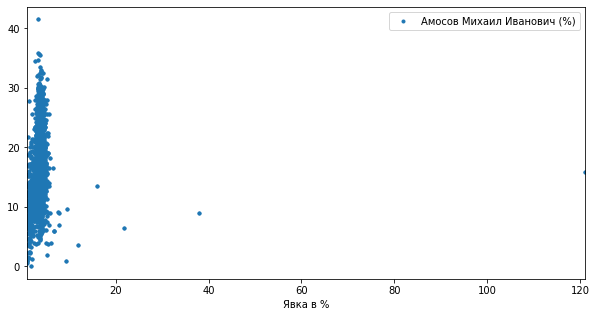

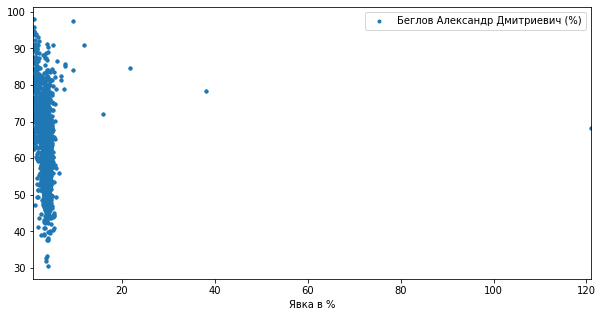

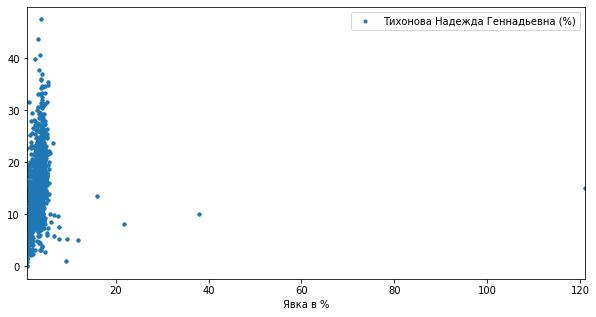

In [124]:
tempDf.plot(x='Явка в %', y='Амосов Михаил Иванович (%)', style='.', figsize=(10, 5))
tempDf.plot(x='Явка в %', y='Беглов Александр Дмитриевич (%)', style='.', figsize=(10, 5))
tempDf.plot(x='Явка в %', y='Тихонова Надежда Геннадьевна (%)', style='.', figsize=(10, 5));